In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import interp
from scipy.interpolate import UnivariateSpline
from scipy.special import erf
%matplotlib nbagg

<IPython.core.display.Javascript object>


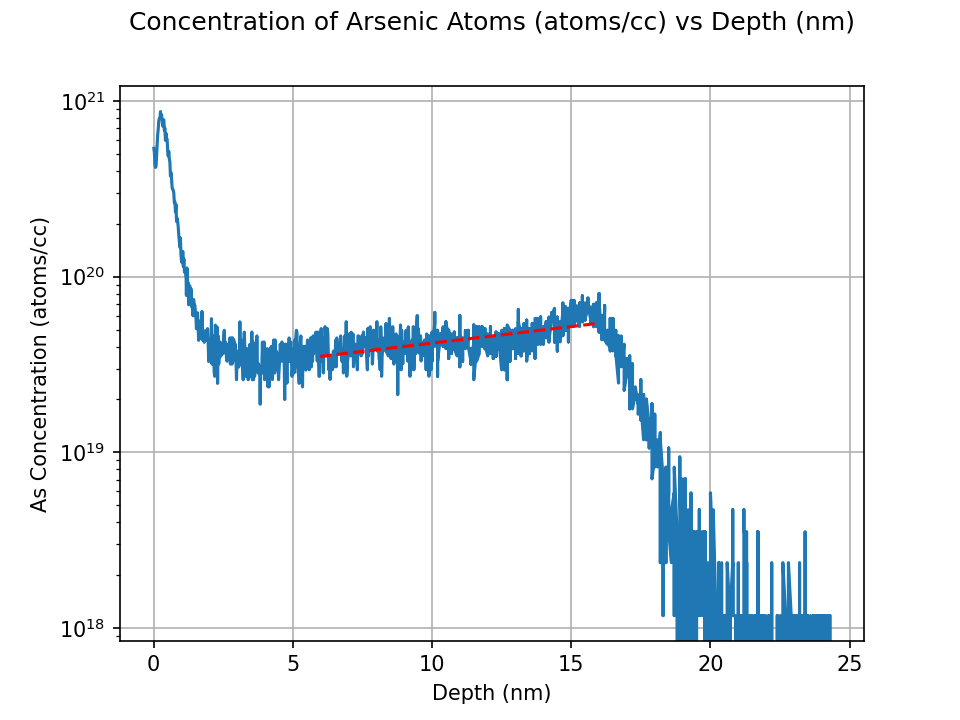

0.04346102558343317


In [3]:
fig = plt.figure()
df = pd.read_csv(r'\Users\devan\OneDrive\Documents\MasterProject\Morden.csv')
X_data = df.Depth_As.values
Y_data = df.As.values
# a = np.array(X_data)
# print(np.where(a == 4.92))
# print(np.where(a == 12.1))
# #print(df.head())
line = np.polyfit(X_data[300:800],Y_data[300:800],1)
poly = np.poly1d(line)
ax = fig.add_subplot(111)
p = np.polyfit(X_data[300:800], np.log(Y_data[300:800]), 1) # 300 380
slope,intercept = p #logy = a*x + b
# print(p)
# new_y = poly(X_data)
ax.plot(X_data,Y_data)
ax.semilogy(X_data[300:800], np.exp(p[0] * X_data[300:800] + p[1]), 'r--')
print(slope)
ax.set_yscale('log')

# plt.show()
# #plt.plot(X_data,new_y)
plt.xlabel('Depth (nm)')
plt.ylabel('As Concentration (atoms/cc)')
plt.title("Concentration of Arsenic Atoms (atoms/cc) vs Depth (nm)", y = 1.08)
plt.grid()

In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import interp
from scipy.interpolate import UnivariateSpline
from scipy.special import erf
%matplotlib nbagg

614967318.3165988


<IPython.core.display.Javascript object>


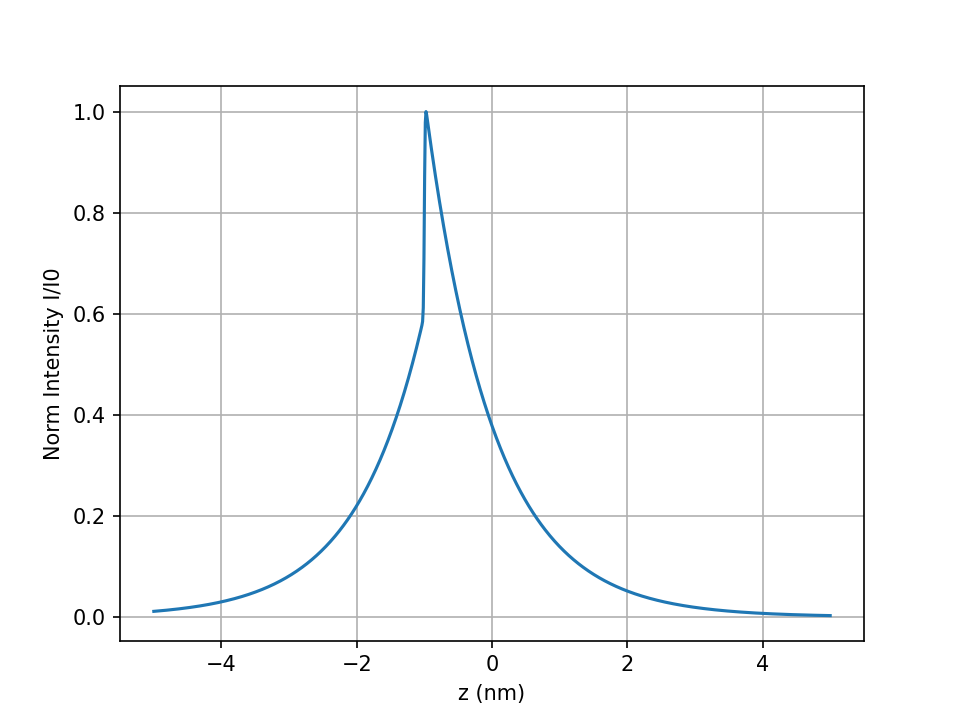

614967318.3165988


In [5]:
z = np.linspace(-5,5,1000)
z1 = [i * 1*10**-9 for i in z]
g_mri1 = []
for i in z1:
    w = 1*10**-9
    lam = 1*10**-9
    sig = 0.01*10**-9
    a = ((1/(2*w))*(1-np.exp(-w/lam))*np.exp(((-i-w)/w)+((sig**2)/(2*w**2))))
    b = (1 - erf((1/np.sqrt(2))*(((-i-w)/sig)+(sig/w))))
    c = ((1/(2*lam))*np.exp((i/lam)+((sig**2)/(2*lam**2))))
    d = (1 + erf((1/np.sqrt(2))*(((-i-w)/sig)-(sig/lam))))                                                              
    final = (a*b)+(c*d)
    g_mri1.append(final)
print(np.max(g_mri1))
gn = []
for j in g_mri1:
    f = j/614967318.3165988#5.1660669307963576e+16#np.max(g_mri1)
    gn.append(f)   
plt.plot(z,gn)
plt.xlabel('z (nm)')
plt.ylabel('Norm Intensity I/I0')
print(np.max(g_mri1))
plt.grid()

In [6]:
def MRIFunc(w,lam,sig,a_ll): # MRI Function is defined, taking three input values w, lambda and sigma # a_ll
    z = np.linspace(-5,5,1000) # creates sequence of evenly 1000 evenly spaced values from -5 to 5
    #z2 = np.linspace(-10,10,1999) 
    z1 = [i * 1*10**-9 for i in z] # converts all z values in sequence into nanometres 
    g_mri1 = [] # defines an empty matrix for final mri intensity values

    
    Ns_m = []
    for i in z1: # loops through all the values in z1, inputting them into the analyticl expressino for the MRI
        a = ((1/(2*w))*(1-np.exp(-w/lam))*np.exp(((-i-w)/w)+((sig**2)/(2*w**2)))) # the analytical expression broken down into four parts a,b,c and d
        b = (1 - erf((1/np.sqrt(2))*(((-i-w)/sig)+(sig/w))))
        c = ((1/(2*lam))*np.exp((i/lam)+((sig**2)/(2*lam**2))))
        d = (1 + erf((1/np.sqrt(2))*(((-i-w)/sig)-(sig/lam))))                                                              
        final = (a*b)+(c*d)
        g_mri1.append(final) # the output of the equation is inputted into the empty MRI matrix
      #  global E 
        N_surf = np.exp(a_ll*i)
        Ns_m.append(N_surf)
        MRI_Ns = np.convolve(g_mri1,Ns_m)
 #   for j in g_mri1:
 #       f = j/np.max(g_mri1)
 #       gn.append(f) 
    return(MRI_Ns)

def EXPFunc(MRI_Ns, A):
        MRI_F = (MRI_Ns/A)*1.4195639999999999e+21#*1.9506904999999997e+21
        return(MRI_F) 

<IPython.core.display.Javascript object>


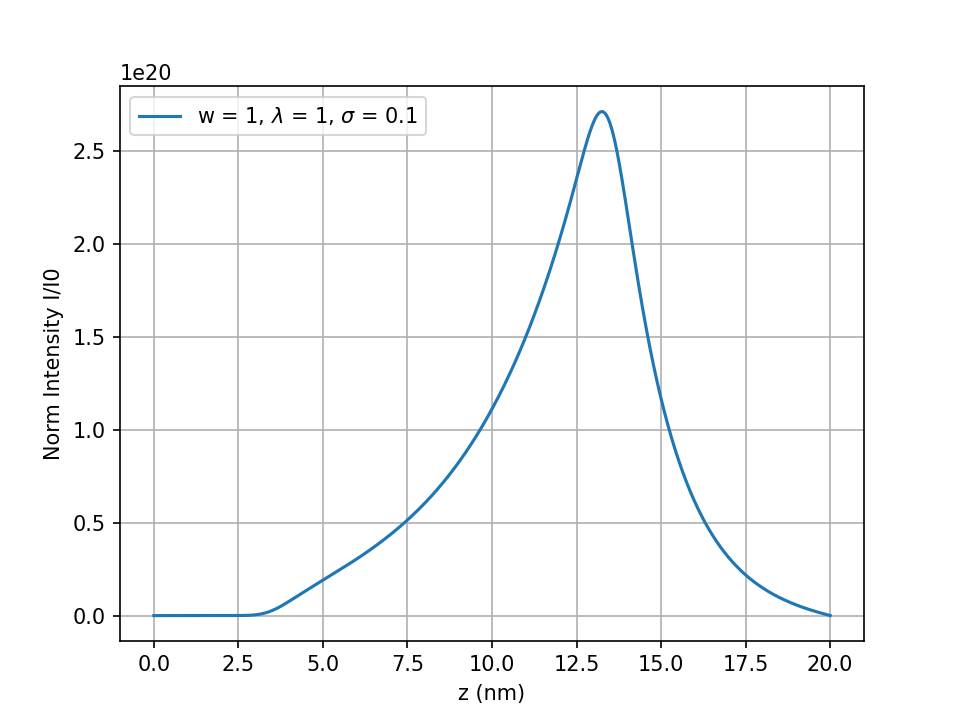

In [7]:
plt.figure() # plots an empty figure
z2 = np.linspace(0,20,1999)
one = MRIFunc(1.58*10**-9, 0.136*10**-9, 0.4*10**-9,0.3*10**9) # w, lam, sig are input into the MRI function: 1.58*10**-9, 0.136*10**-9, 0.4*10**-9,0.3*10**9
onef = EXPFunc(one,np.trapz(one,z2))
#two = MRIFunc(1*10**-9, 0.3*10**-9, 0.01*10**-9, 100*10**9)
#twof = EXPFunc(two,np.trapz(two))
#three = MRIFunc(1*10**-9, 0.3*10**-9, 1*10**-9,100*10**9)
#threef = EXPFunc(three,np.trapz(three))
#four = MRIFunc(2*10**-9, 0.01*10**-9, 0.01*10**-9,100*10**9)
#fourf = EXPFunc(four,np.trapz(four))
#plt.autoscale(False)
ax = plt.subplot(111) # allows for multiple graph to be plot on the same figure
ax.plot(z2,onef, label = 'w = 1, $\lambda$ = 1, $\sigma$ = 0.1')
#ax.semilogy(z2, onef, 'r--')
# The MRI intensity is plot against z
#ax.plot(z2,twof, label = 'w = 1, $\lambda$ = 0.3, $\sigma$ = 0.01')
#ax.plot(z2,threef, label = 'w = 1, $\lambda$ = 0.3, $\sigma$ = 1')
#ax.plot(z2,fourf, label = 'w = 2, $\lambda$ = 0.01, $\sigma$ = 0.01')
plt.xlabel('z (nm)')
plt.ylabel('Norm Intensity I/I0')
#plt.xlim((0, 10))
ax.legend() # creates legend 
plt.grid() # creates grid on figure 
plt.show()

<IPython.core.display.Javascript object>


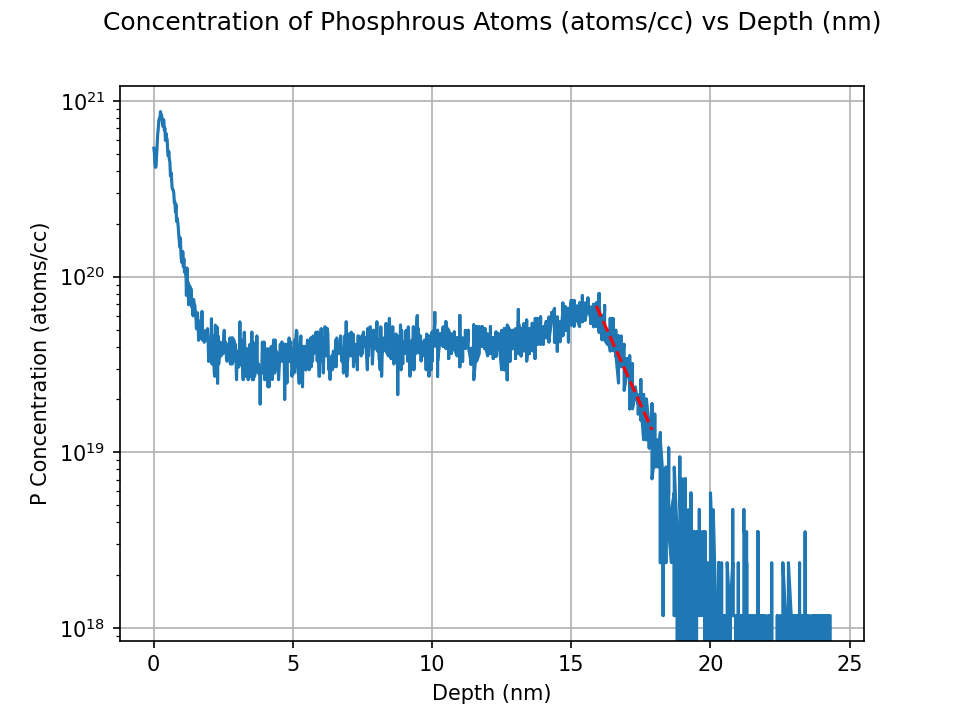

-6.574099999999997e+20
-1.2330040527175175


In [6]:
fig = plt.figure()
df = pd.read_csv(r'\Users\devan\OneDrive\Documents\MasterProject\Morden.csv')

X_data = df.Depth_As.values
Y_data = df.As.values
#print(X_data)
#a = np.array(X_data)
#print(np.where(a == 12.5))
#print(np.where(a == 17.8))
#print(df.head())
line = np.polyfit(X_data[800:900],Y_data[800:900],1) # 85:121
poly = np.poly1d(line)
ax = fig.add_subplot(111)
p = np.polyfit(X_data[800:900], np.log(Y_data[800:900]), 1) # 300 380
slope,intercept = p #logy = a*x + b
#print(p)
new_y = poly(X_data)
#ax.plot(X_data[17:135],Y_data[17:135]) #17:135

print(np.trapz(X_data[800:900],Y_data[800:900]))
#ax.semilogy(X_data[800:900], np.exp(p[0] * X_data[800:900] + p[1]), 'r--')
print(1/slope)
ax.set_yscale('log')

plt.show()
plt.plot(X_data,Y_data) # 85:950
ax.semilogy(X_data[800:900], np.exp(p[0] * X_data[800:900] + p[1]), 'r--')
plt.xlabel('Depth (nm)')
#plt.xlim((0, 20))
#plt.ylim((0, 0.3*10**21))
plt.ylabel('P Concentration (atoms/cc)')
plt.title("Concentration of Phosphrous Atoms (atoms/cc) vs Depth (nm)", y = 1.08)
plt.grid()

<IPython.core.display.Javascript object>


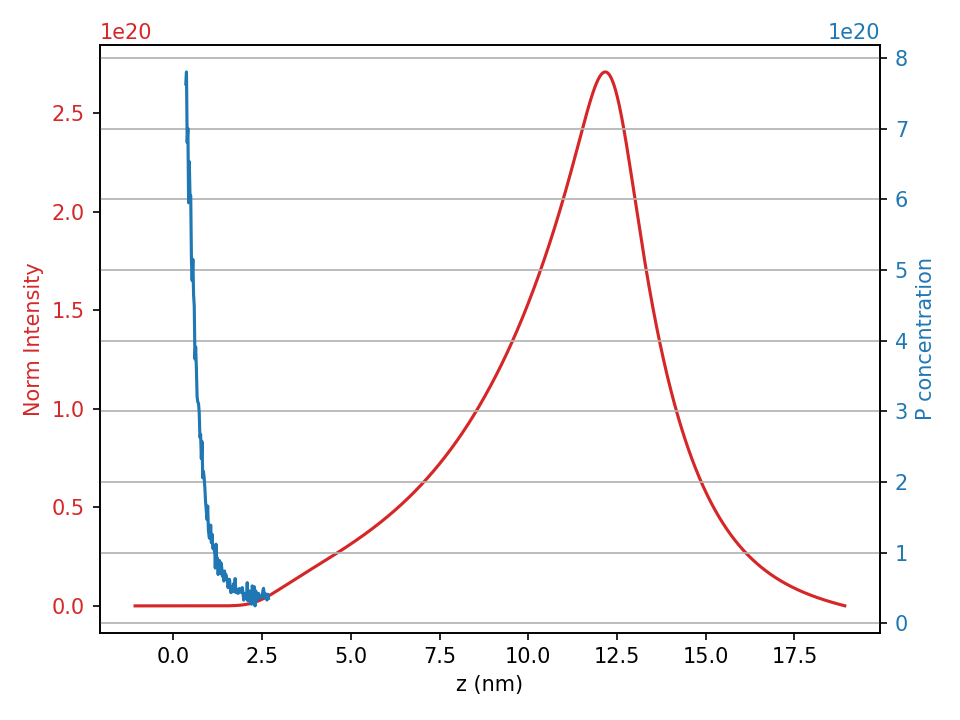

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('z (nm)')
ax1.set_ylabel('Norm Intensity', color=color)
ax1.plot(z2-1.08, onef, color=color)#-1.08
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('z (nm)')
ax2.set_ylabel('P concentration', color=color)  # we already handled the x-label with ax1
ax2.plot(X_data[17:135], Y_data[17:135], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()